In [1]:
pip install pyreadstat

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import statsmodels.formula.api as smf
import pandas as pd
import pyreadstat
import numpy as np
from IPython.display import display
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
import statsmodels.stats.api as sms


import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Считывание

In [4]:
data_2012, meta = pyreadstat.read_sav('/content/drive/MyDrive/Colab Notebooks/econometrics/21-я волна_репрезентативная выборка_SPSS/21-я волна_репрезентативная выборка_SPSS/ИНДИВИДЫ/r21i_os_71.sav')
data_2017, meta = pyreadstat.read_sav('/content/drive/MyDrive/Colab Notebooks/econometrics/26-я волна_репрезентативная выборка_SPSS/26-я волна_репрезентативная выборка_SPSS/ИНДИВИДЫ/r26i_os_73.sav')
display(data_2012.head())
print(data_2012.shape)
display(data_2017.head())
print(data_2017.shape)

,idind,qredid_i,qid_i,qid_h,pid_i,pid_h,oid_i,oid_h,nid_i,nid_h,...,qm102,qm103,qm104,qm105,qm106,qm107,qm108,qm109,qm111,q_ff
0,1.0,179901.0,1000101.0,10001.0,1000101.0,10001.0,1000101.0,10001.0,100101.0,1001.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,7.0,180101.0,1000301.0,10003.0,1000301.0,10003.0,1000301.0,10003.0,100301.0,1003.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,9.0,180201.0,1000401.0,10004.0,1000401.0,10004.0,1000401.0,10004.0,100401.0,1004.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,26.0,181101.0,1002001.0,10020.0,1002001.0,10020.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,36.0,181301.0,1002401.0,10024.0,1002401.0,10024.0,1002401.0,10024.0,102401.0,1024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


(17090, 965)


,idind,vredid_i,vid_i,vid_h,uid_i,uid_h,tid_i,tid_h,sid_i,sid_h,...,vm98,vm99,vm100,vm101,vm102,vm103,vm104,vm105,vm106,vm107
0,3.0,34201.0,1001201.0,10012.0,1001201.0,10012.0,1001201.0,10012.0,1001201.0,10012.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.0,34401.0,1000301.0,10003.0,1000301.0,10003.0,1000301.0,10003.0,1000301.0,10003.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.0,34001.0,1000401.0,10004.0,1000401.0,10004.0,1000401.0,10004.0,1000401.0,10004.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37.0,41902.0,1002402.0,10024.0,1002402.0,10024.0,1002402.0,10024.0,1002402.0,10024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,60.0,27302.0,1004702.0,10047.0,1004702.0,10047.0,NaN,NaN,1004702.0,10047.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(12441, 827)


In [5]:
novosib_2012 = data_2012[data_2012['region'] == 161]
display(novosib_2012.head(5))
display(novosib_2012.shape)

,idind,qredid_i,qid_i,qid_h,pid_i,pid_h,oid_i,oid_h,nid_i,nid_h,...,qm102,qm103,qm104,qm105,qm106,qm107,qm108,qm109,qm111,q_ff
4116,22359.0,595001.0,161000301.0,1610003.0,161000301.0,1610003.0,161000301.0,1610003.0,16100301.0,161003.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4117,22360.0,595101.0,161000401.0,1610004.0,161000401.0,1610004.0,161000401.0,1610004.0,16100401.0,161004.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4118,22362.0,595202.0,161000502.0,1610005.0,161000502.0,1610005.0,161000502.0,1610005.0,16100502.0,161005.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4119,22363.0,595301.0,161000601.0,1610006.0,161000601.0,1610006.0,161000601.0,1610006.0,16100601.0,161006.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4120,22364.0,595302.0,161000602.0,1610006.0,161000602.0,1610006.0,161000602.0,1610006.0,16100602.0,161006.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


(335, 965)

In [6]:
saratov_2012 = data_2012[data_2012['region'] == 70]
display(saratov_2012.head(5))
display(saratov_2012.shape)

,idind,qredid_i,qid_i,qid_h,pid_i,pid_h,oid_i,oid_h,nid_i,nid_h,...,qm102,qm103,qm104,qm105,qm106,qm107,qm108,qm109,qm111,q_ff
929,3943.0,806201.0,70000301.0,700003.0,70000301.0,700003.0,70000301.0,700003.0,7000301.0,70003.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
930,3944.0,806301.0,70000401.0,700004.0,70000401.0,700004.0,70000401.0,700004.0,7000401.0,70004.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
931,3971.0,807101.0,70002401.0,700024.0,70002401.0,700024.0,70002401.0,700024.0,7002401.0,70024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
932,3977.0,807201.0,70002601.0,700026.0,70002601.0,700026.0,70002601.0,700026.0,7002601.0,70026.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
933,3979.0,807203.0,70002603.0,700026.0,70002603.0,700026.0,NaN,NaN,7003803.0,70038.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


(370, 965)

In [7]:
novosib_2017 = data_2017[data_2017['region'] == 161]
display(novosib_2017.head(5))
display(novosib_2017.shape)

,idind,vredid_i,vid_i,vid_h,uid_i,uid_h,tid_i,tid_h,sid_i,sid_h,...,vm98,vm99,vm100,vm101,vm102,vm103,vm104,vm105,vm106,vm107
2839,22360.0,503101.0,161000401.0,1610004.0,161000401.0,1610004.0,161000401.0,1610004.0,161000401.0,1610004.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2840,22362.0,503202.0,161000502.0,1610005.0,161000502.0,1610005.0,161000502.0,1610005.0,161000502.0,1610005.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2841,22363.0,503301.0,161000601.0,1610006.0,161000601.0,1610006.0,161000601.0,1610006.0,161000601.0,1610006.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2842,22364.0,503302.0,161000602.0,1610006.0,161000602.0,1610006.0,161000602.0,1610006.0,161000602.0,1610006.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2843,22368.0,503501.0,161000801.0,1610008.0,161000801.0,1610008.0,161000801.0,1610008.0,161000801.0,1610008.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(261, 827)

In [8]:
saratov_2017 = data_2017[data_2017['region'] == 70]
display(saratov_2017.head(5))
display(saratov_2017.shape)

,idind,vredid_i,vid_i,vid_h,uid_i,uid_h,tid_i,tid_h,sid_i,sid_h,...,vm98,vm99,vm100,vm101,vm102,vm103,vm104,vm105,vm106,vm107
619,3944.0,361301.0,70000401.0,700004.0,70000401.0,700004.0,70000401.0,700004.0,70000401.0,700004.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
620,3971.0,361601.0,70002401.0,700024.0,NaN,NaN,70002401.0,700024.0,70002401.0,700024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
621,3993.0,361801.0,70004601.0,700046.0,NaN,NaN,NaN,NaN,70004601.0,700046.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
622,3995.0,361803.0,70004603.0,700046.0,NaN,NaN,NaN,NaN,70004603.0,700046.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
623,4000.0,361901.0,70004901.0,700049.0,70004901.0,700049.0,70004901.0,700049.0,70004901.0,700049.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(324, 827)

# Решение

### Решение всех проблем

In [57]:
diploma_mapping = {
    1: "окончил_до_6_классов",
    2: "незаконченное_среднее_образование",
    3: "незаконченное_среднее_образование_и_что_то_еще",
    4: "законченное_среднее_образование",
    5: "законченное_среднее_специальное_образование",
    6: "законченное_высшее_образование_и_выше"
}

gender_mapping = {
    1: "МУЖСКОЙ",
    2: "ЖЕНСКИЙ"
}

occup08_mapping = {
    0: "военнослужащие",
    1: "законы_крупные_чиновники_руководители_высш_сред_звена",
    2: "специалисты_высшего_уровня_квалификации",
    3: "специалисты_среднего_уровня_квалификации_чиновники",
    4: "служащие_офисные_и_по_обслуживанию_клиентов",
    5: "работники_сферы_торговли_и_услуг",
    6: "квалифицированные_работники_сельского_лесного_хозва_и_рыбоводства",
    7: "квалифицированные_рабочие_занятые_ручным_трудом",
    8: "квалифицированные_рабочие_использующие_машины_и_механизмы",
    9: "неквалифицированные_рабочие_всех_отраслей"
}

j4_1_mapping = {
    1: "ЛЕГКАЯ_ПИЩЕВАЯ_ПРОМЫШЛЕННОСТЬ",
    2: "ГРАЖДАНСКОЕ_МАШИНОСТРОЕНИЕ",
    3: "ВОЕННО_ПРОМЫШЛЕННЫЙ_КОМПЛЕКС",
    4: "НЕФТЕГАЗОВАЯ_ПРОМЫШЛЕННОСТЬ",
    5: "ДРУГАЯ_ОТРАСЛЬ_ТЯЖЕЛОЙ_ПРОМЫШЛЕННОСТИ",
    6: "СТРОИТЕЛЬСТВО",
    7: "ТРАНСПОРТ_СВЯЗЬ",
    8: "СЕЛЬСКОЕ_ХОЗЯЙСТВО",
    9: "ОРГАНЫ_УПРАВЛЕНИЯ",
    10: "ОБРАЗОВАНИЕ",
    11: "НАУКА_КУЛЬТУРА",
    12: "ЗДРАВООХРАНЕНИЕ",
    13: "АРМИЯ_MVD_ОРГАНЫ_БЕЗОПАСНОСТИ",
    14: "ТОРГОВЛЯ_БЫТОВОЕ_ОБСЛУЖИВАНИЕ",
    15: "ФИНАНСЫ",
    16: "ЭНЕРГЕТИЧЕСКАЯ_ПРОМЫШЛЕННОСТЬ",
    17: "ЖИЛИЩНО_КОММУНАЛЬНОЕ_ХОЗЯЙСТВО",
    18: "ОПЕРАЦИИ_С_НЕДВИЖИМОСТЬЮ",
    20: "СОЦИАЛЬНОЕ_ОБСЛУЖИВАНИЕ",
    21: "ЮРИСПРУДЕНЦИЯ",
    22: "ЦЕРКОВЬ",
    23: "ХИМИЧЕСКАЯ_ПРОМЫШЛЕННОСТЬ",
    24: "ДЕРЕВООБРАБАТЫВАЮЩАЯ_ПРОМЫШЛЕННОСТЬ_ЛЕСНОЕ_ХОЗЯЙСТВО",
    25: "СПОРТ_ТУРИЗМ_РАЗВЛЕЧЕНИЯ",
    26: "УСЛУГИ_НАСЕЛЕНИЮ",
    27: "IT_ИНФОРМАЦИОННЫЕ_ТЕХНОЛОГИИ",
    28: "ЭКОЛОГИЯ_ЗАЩИТА_ОКРУЖАЮЩЕЙ_СРЕДЫ",
    29: "ОРГАНИЗАЦИЯ_ОБЩЕСТВЕННОГО_ПИТАНИЯ",
    30: "СМИ_ИЗДАТЕЛЬСТВО_ПЕЧАТЬ_ТЕЛЕКОММУНИКАЦИИ",
    31: "РЕКЛАМА_МАРКЕТИНГ",
    32: "ОБЩЕСТВЕННЫЕ_ОРГАНИЗАЦИИ_СОВЕТ_ВЕТЕРАНОВ_И_ПР"
}

i3_mapping = {
    1: "ГОРОД",
    2: "ПГТ",
    3: "СЕЛО"
}

marts_mapping = {
    1: 'не_состоял',
    2: 'брак',
    3: 'брак',
    7: 'брак'
}

In [62]:
def del_missing(data_1, cols, letter):
  data_1
  data_1 = data_1[data_1[f'{letter}j13.2'] < 99999997]
  print(data_1.shape)
  data_1.dropna(subset=cols, inplace=True) # [f'{letter}j13.2', f'{letter}i3', f'{letter}_diplom', f'{letter}h5', f'{letter}_age', f'{letter}j6.2']
  print(f'after drop na: {data_1.shape}')
  # дропаем отказы от ответа
  for col in cols:
    data_1 = data_1[data_1[col] < 99999997]
  # data_1 = data_1[data_1[f'{letter}j6.2'] < 99999997]
    # data_1 = data_1[data_1[f'{letter}_diplom'] < 99999997]
    # data_1 = data_1[data_1[f'{letter}h5'] < 99999997]
    # data_1 = data_1[data_1[f'{letter}_occup08'] < 99999997]
    # data_1 = data_1[data_1[f'{letter}j4.1'] < 99999997]
  # data_1 = data_1[data_1[f'{letter}_marst'] < 99999997]
  print('After mapping: \n')
  # смена чисел на категории
  data_1[f'{letter}_diplom'] = data_1[f'{letter}_diplom'].replace(diploma_mapping)
  print(set(data_1[f'{letter}_diplom']))
  data_1[f'{letter}h5'] = data_1[f'{letter}h5'].replace(gender_mapping)
  print(set(data_1[f'{letter}h5']))
  data_1[f'{letter}_occup08'] = data_1[f'{letter}_occup08'].replace(occup08_mapping)
  print(set(data_1[f'{letter}_occup08']))
  data_1[f'{letter}j4.1'] = data_1[f'{letter}j4.1'].replace(j4_1_mapping)
  print(set(data_1[f'{letter}j4.1']))
  #data_1[f'{letter}_marst'] = data_1[f'{letter}_marst'].replace(marts_mapping)
  #print(set(data_1[f'{letter}_marst']))
  # смена имен
  data_1[f'{letter}j4_1'] = data_1[f'{letter}j4.1']
  data_1['zarabotok'] = data_1[f'{letter}j13.2']
  data_1[f'{letter}j6_2'] = data_1[f'{letter}j6.2']
  data_1[f'{letter}j72_18a'] = data_1[f'{letter}j72.18a']
  # делаем дамми переменные
  data_1_dummies = pd.get_dummies(data_1, columns=[f'{letter}_diplom', f'{letter}h5', f'{letter}_occup08', f'{letter}j4_1'])
  return data_1_dummies

In [11]:
cols_2012 = ['qj4.1', 'qj6.2', 'q_diplom', 'qh5', 'q_occup08']

In [12]:
cols_2017 = ['vj4.1', 'vj6.2', 'v_diplom', 'vh5', 'v_occup08']

### Модель, графики и тесты

In [13]:
# тут можно что-нибудь проверить, какую-нибудь гипотезу
# coef_f = model_novosib_2012.params['qh5_МУЖСКОЙ[T.True]']
# model_novosib_2012.f_test(f'qj4_1_ОБРАЗОВАНИЕ[T.True] = 0')

In [71]:
def model_and_analitics_main(dummest, cols_modded):
  formula = 'zarabotok ~ ' + ' + '.join(cols_modded)
  model_estimated = smf.ols(formula, data=dummest).fit(cov_type='HC3')
  print(model_estimated.summary())
  print('\n')
  # тут можно что-нибудь проверить, какую-нибудь гипотезу
  # coef_f = model_novosib_2012.params['qh5_МУЖСКОЙ[T.True]']
  # print(f'Гипотеза о qj4_1_ОБРАЗОВАНИЕ[T.True] = 0')
  # model_novosib_2012.f_test(f'qj4_1_ОБРАЗОВАНИЕ[T.True] = 0')
  # vif test на мультиколлинеарность, если меньше 10, значит нет мультиколл., значит все хорошо)
  # Разделение данных на зависимую (y) и независимые переменные (X)
  y, X = dmatrices(formula, dummest, return_type='dataframe')
  # Расчет VIF для каждой независимой переменной
  vif_data = pd.DataFrame()
  vif_data['Variable'] = X.columns
  vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  # Вывод результатов
  print(vif_data)
  print('\n')


  # Графики
  plt.figure(figsize=(8, 6))
  plt.bar(vif_data.loc[vif_data['Variable'] != 'Intercept']["Variable"], vif_data.loc[vif_data['Variable'] != 'Intercept']["VIF"], color='blue')
  plt.axhline(y=10, color='red', linestyle='--', label='Критическое значение (VIF=10)')
  plt.title("VIF для регрессоров", fontsize=16)
  plt.xlabel("Регрессоры", fontsize=12)
  plt.ylabel("Значение VIF", fontsize=12)
  plt.xticks(rotation=75)
  plt.legend()
  plt.savefig('vif.png')
  plt.show()
  print('\n')

  # Разделим данные на обучающую и тестовую выборки
  X = dummest[cols_modded]
  y = dummest['zarabotok']
  # Разделяем на train и test (80% - обучение, 20% - тестирование)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  # Строим модель на обучающих данных с робастными стандартными ошибками
  model_est_for_graph = smf.ols(formula, data=dummest).fit(cov_type='HC3')
  # Предсказываем значения для тестовой выборки
  y_pred = model_est_for_graph.predict(X_test)
  # Строим график с истинными и предсказанными значениями
  plt.figure(figsize=(10, 6))
  plt.plot(y_test.values, label='Истинные значения', color='blue', linestyle='-', marker='o')
  plt.plot(y_pred.values, label='Предсказанные значения', color='red', linestyle='-', marker='x')
  plt.title('Истинные vs Предсказанные значения зарплаты')
  plt.xlabel('Наблюдения')
  plt.ylabel('Зарплата')
  plt.legend()
  plt.grid(True)
  plt.savefig('pred.png')
  plt.show()
  print('\n')

  # график квадратов остатков
  plt.clf()
  plt.scatter(range(len(model_estimated.resid)), model_estimated.resid ** 2)
  plt.savefig('resid.png')
  plt.show()
  print('\n')

  print(model_estimated.resid.describe())
  print('\n')
  # коробочка для остатков
  plt.figure(figsize=(10, 3))
  sns.boxplot(x=model_estimated.resid)
  plt.title('График остатков')
  plt.savefig('resid_box.png')
  plt.show()

  mdl_not_est = smf.ols(formula, data=dummest)

  # тесты
  result_gold_test = sms.het_goldfeldquandt(y=mdl_not_est.endog, x=mdl_not_est.exog, split=.35, drop=.3)
  print(f'Результаты теста голдфельда-квандта: \n f-statictic: {result_gold_test[0]} \n p-value: {result_gold_test[1]} \n Альтернативная гипотеза: {result_gold_test[2]} \n')

  result_breuschpagan = sms.het_breuschpagan(model_estimated.resid, mdl_not_est.exog)
  print(f'Результаты теста Бройша-Пагана: \n lm: {result_breuschpagan[0]} \n lm p-value: {result_breuschpagan[1]} \n f-statictic: {result_breuschpagan[2]} \n p-value: {result_breuschpagan[3]} \n')

  result_white = sms.het_white(model_estimated.resid, mdl_not_est.exog)
  print(f'Результаты теста Уайта: \n lm: {result_white[0]} \n lm p-value: {result_white[1]} \n f-statictic: {result_white[2]} \n p-value: {result_white[3]} \n')


  return model_estimated

### Доп график, надо править

In [15]:
#один список для данных из датафрейма, другой для коэффициентов в модели, если менять, то сразу оба, чтобы соотвествовали
# cols_novosib = []
# cols_novosib_mdl = ['qj4_1_ОБРАЗОВАНИЕ[T.True]', 'qj4_1_СТРОИТЕЛЬСТВО[T.True]', 'qj4_1_УСЛУГИ_НАСЕЛЕНИЮ[T.True]', 'qj6_2', 'q_diplom_законченное_высшее_образование_и_выше[T.True]', 'qh5_МУЖСКОЙ[T.True]', 'q_occup08_законы_крупные_чиновники_руководители_высш_сред_звена[T.True]']

In [16]:
# def plot_scatter_with_regression(nov_2012_dummies, model_novosib_2012, regressor, regressor_mdl):
#     sns.scatterplot(x=nov_2012_dummies[regressor], y=nov_2012_dummies['zarabotok'], label="Данные")
#     plt.plot(
#         nov_2012_dummies[regressor],
#         model_novosib_2012.params[regressor_mdl] * nov_2012_dummies[regressor] + model_novosib_2012.params['Intercept'],
#         color='red', label="Линия регрессии"
#     )
#     plt.title(f'Диаграмма рассеяния: {regressor} и zarabotok')
#     plt.xlabel(regressor)
#     plt.ylabel('zarabotok')
#     plt.legend()
#     plt.show()

# # Построим графики для всех регрессоров
# for regressor, regressor_mdl in zip(cols_novosib, cols_novosib_mdl):
#   plot_scatter_with_regression(nov_2012_dummies, model_novosib_2012, regressor, regressor_mdl)

# Новосибирск

### 2012

In [72]:
nov_2012_dummest = del_missing(novosib_2012, cols_2012, 'q')

(147, 965)
after drop na: (147, 965)
After mapping: 

{'незаконченное_среднее_образование', 'законченное_среднее_специальное_образование', 'законченное_высшее_образование_и_выше', 'незаконченное_среднее_образование_и_что_то_еще', 'законченное_среднее_образование'}
{'МУЖСКОЙ', 'ЖЕНСКИЙ'}
{'неквалифицированные_рабочие_всех_отраслей', 'военнослужащие', 'законы_крупные_чиновники_руководители_высш_сред_звена', 'квалифицированные_рабочие_занятые_ручным_трудом', 'специалисты_высшего_уровня_квалификации', 'специалисты_среднего_уровня_квалификации_чиновники', 'работники_сферы_торговли_и_услуг', 'квалифицированные_рабочие_использующие_машины_и_механизмы', 'служащие_офисные_и_по_обслуживанию_клиентов'}
{'ОБРАЗОВАНИЕ', 'ТОРГОВЛЯ_БЫТОВОЕ_ОБСЛУЖИВАНИЕ', 'ФИНАНСЫ', 'СТРОИТЕЛЬСТВО', 'ТРАНСПОРТ_СВЯЗЬ', 'ЗДРАВООХРАНЕНИЕ', 'ВОЕННО_ПРОМЫШЛЕННЫЙ_КОМПЛЕКС', 'ЭНЕРГЕТИЧЕСКАЯ_ПРОМЫШЛЕННОСТЬ', 'АРМИЯ_MVD_ОРГАНЫ_БЕЗОПАСНОСТИ', 'ЛЕГКАЯ_ПИЩЕВАЯ_ПРОМЫШЛЕННОСТЬ', 'СЕЛЬСКОЕ_ХОЗЯЙСТВО', 'ГРАЖДАНСКОЕ_МАШИНОСТРОЕНИЕ', '

<ipython-input-62-08ed5b4f3406>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1.dropna(subset=cols, inplace=True) # [f'{letter}j13.2', f'{letter}i3', f'{letter}_diplom', f'{letter}h5', f'{letter}_age', f'{letter}j6.2']


In [73]:
cols_modded_2012_nov = [
    'qj4_1_УСЛУГИ_НАСЕЛЕНИЮ',
    'qj6_2',
    'q_diplom_законченное_высшее_образование_и_выше',
    'qh5_МУЖСКОЙ',
    'q_occup08_законы_крупные_чиновники_руководители_высш_сред_звена',
    'qj4_1_НАУКА_КУЛЬТУРА',
    'qj4_1_СТРОИТЕЛЬСТВО',
    'qj4_1_ОБРАЗОВАНИЕ'
    ]

In [70]:
# model_novosib_2012_alt_miv_p_val = smf.ols('zarabotok ~ q_diplom_законченное_высшее_образование_и_выше + qh5_МУЖСКОЙ + q_occup08_законы_крупные_чиновники_руководители_высш_сред_звена + qj4_1_НАУКА_КУЛЬТУРА + qj4_1_СТРОИТЕЛЬСТВО + qj4_1_ОБРАЗОВАНИЕ + qj6_2 + q_diplom_законченное_высшее_образование_и_выше', data=nov_2012_dummest).fit(cov_type='HC3')
# print(model_novosib_2012_alt_miv_p_val.summary())

                            OLS Regression Results                            
Dep. Variable:              zarabotok   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     6.695
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           8.40e-07
Time:                        02:59:52   Log-Likelihood:                -1465.6
No. Observations:                 142   AIC:                             2947.
Df Residuals:                     134   BIC:                             2971.
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

In [68]:
# model_novosib_2012 = smf.ols('zarabotok ~ qj4_1_ОБРАЗОВАНИЕ + qj4_1_СТРОИТЕЛЬСТВО + qj4_1_УСЛУГИ_НАСЕЛЕНИЮ + qj6_2 + q_diplom_законченное_высшее_образование_и_выше + qh5_МУЖСКОЙ + q_occup08_законы_крупные_чиновники_руководители_высш_сред_звена + qj4_1_ТОРГОВЛЯ_БЫТОВОЕ_ОБСЛУЖИВАНИЕ', data=nov_2012_dummest).fit(cov_type='HC3')
# print(model_novosib_2012.summary())

                            OLS Regression Results                            
Dep. Variable:              zarabotok   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     5.891
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           1.89e-06
Time:                        02:55:37   Log-Likelihood:                -1458.3
No. Observations:                 142   AIC:                             2935.
Df Residuals:                     133   BIC:                             2961.
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

### Запуск

                            OLS Regression Results                            
Dep. Variable:              zarabotok   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     5.961
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           1.58e-06
Time:                        03:04:51   Log-Likelihood:                -1458.1
No. Observations:                 142   AIC:                             2934.
Df Residuals:                     133   BIC:                             2961.
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

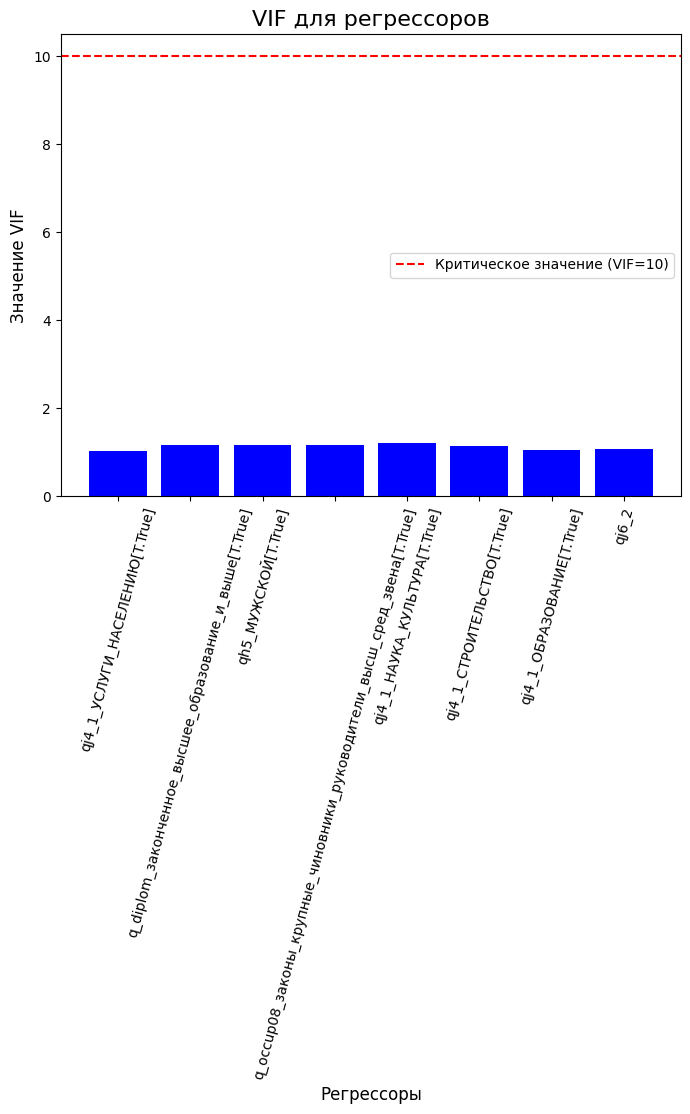

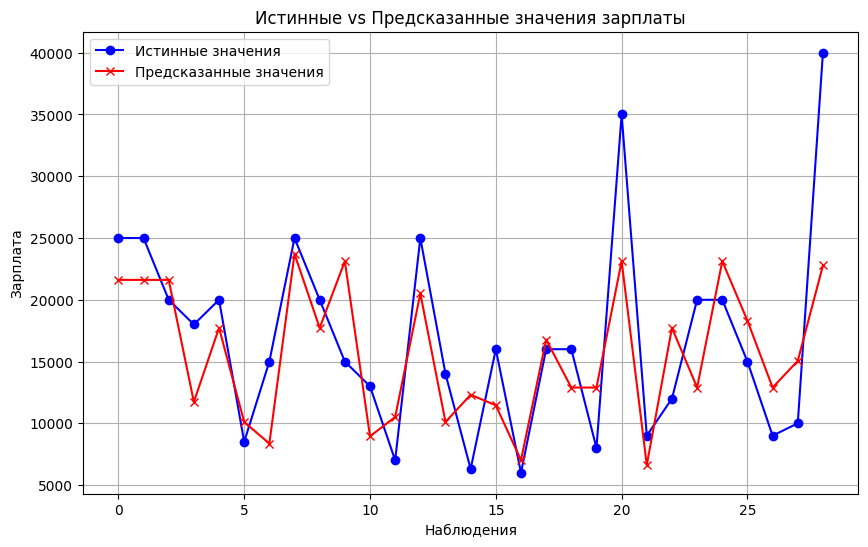

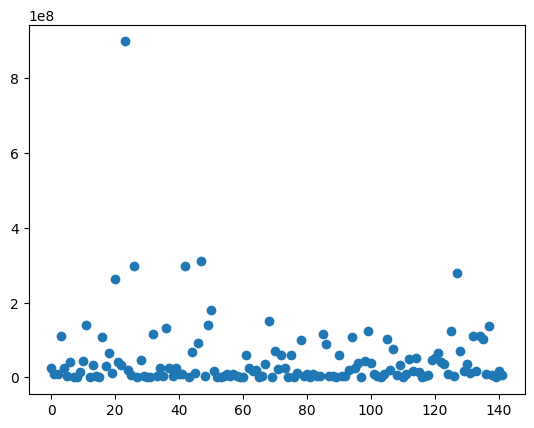



count    1.420000e+02
mean     2.418487e-11
std      6.996719e+03
min     -1.672958e+04
25%     -4.256658e+03
50%     -7.795763e+02
75%      3.389235e+03
max      2.994289e+04
dtype: float64




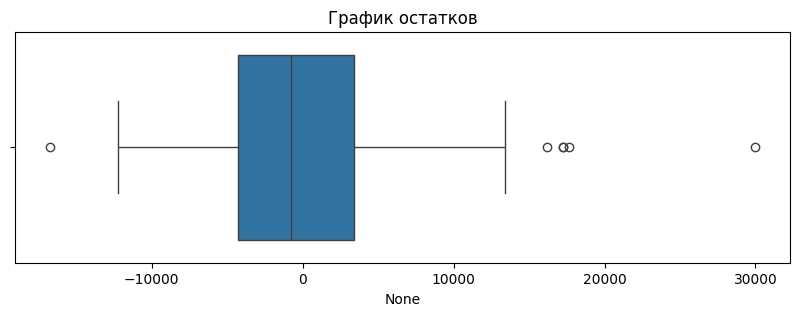

Результаты теста голдфельда-квандта: 
 f-statictic: 0.6275849052589915 
 p-value: 0.9316765421837165 
 Альтернативная гипотеза: increasing 

Результаты теста Бройша-Пагана: 
 lm: 9.57568763095423 
 lm p-value: 0.2960781000151455 
 f-statictic: 1.2021644969615575 
 p-value: 0.3024695852169793 

Результаты теста Уайта: 
 lm: 18.422175534885607 
 lm p-value: 0.8900872395648552 
 f-statictic: 0.6294213323607287 
 p-value: 0.9173802160224013 



In [74]:
model_novosib_2012 = model_and_analitics_main(nov_2012_dummest, cols_modded_2012_nov)

### 2017

In [75]:
nov_2017_dummest = del_missing(novosib_2017, cols_2017, 'v')

(113, 827)
after drop na: (113, 827)
After mapping: 

{'незаконченное_среднее_образование', 'законченное_среднее_специальное_образование', 'законченное_высшее_образование_и_выше', 'незаконченное_среднее_образование_и_что_то_еще', 'законченное_среднее_образование'}
{'МУЖСКОЙ', 'ЖЕНСКИЙ'}
{'неквалифицированные_рабочие_всех_отраслей', 'законы_крупные_чиновники_руководители_высш_сред_звена', 'квалифицированные_рабочие_занятые_ручным_трудом', 'специалисты_высшего_уровня_квалификации', 'специалисты_среднего_уровня_квалификации_чиновники', 'работники_сферы_торговли_и_услуг', 'квалифицированные_рабочие_использующие_машины_и_механизмы', 'служащие_офисные_и_по_обслуживанию_клиентов'}
{'ЖИЛИЩНО_КОММУНАЛЬНОЕ_ХОЗЯЙСТВО', 'СЕЛЬСКОЕ_ХОЗЯЙСТВО', 'ДРУГАЯ_ОТРАСЛЬ_ТЯЖЕЛОЙ_ПРОМЫШЛЕННОСТИ', 'ЮРИСПРУДЕНЦИЯ', 'ГРАЖДАНСКОЕ_МАШИНОСТРОЕНИЕ', 'ТОРГОВЛЯ_БЫТОВОЕ_ОБСЛУЖИВАНИЕ', 'ОБРАЗОВАНИЕ', 'ФИНАНСЫ', 'НАУКА_КУЛЬТУРА', 'ЭНЕРГЕТИЧЕСКАЯ_ПРОМЫШЛЕННОСТЬ', 'СТРОИТЕЛЬСТВО', 'ХИМИЧЕСКАЯ_ПРОМЫШЛЕННОСТЬ', 'АРМИЯ_MVD_ОРГАН

<ipython-input-62-08ed5b4f3406>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1.dropna(subset=cols, inplace=True) # [f'{letter}j13.2', f'{letter}i3', f'{letter}_diplom', f'{letter}h5', f'{letter}_age', f'{letter}j6.2']


In [76]:
cols_modded_2017_nov = [
    'vj6_2',
    'v_diplom_законченное_высшее_образование_и_выше',
    'vh5_МУЖСКОЙ',
    'v_occup08_законы_крупные_чиновники_руководители_высш_сред_звена',
    'vj4_1_НАУКА_КУЛЬТУРА',
    'vj4_1_СТРОИТЕЛЬСТВО',
    'vj4_1_ОБРАЗОВАНИЕ'
    ]

### Запуск

                            OLS Regression Results                            
Dep. Variable:              zarabotok   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     4.545
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           0.000186
Time:                        03:18:29   Log-Likelihood:                -1175.8
No. Observations:                 112   AIC:                             2368.
Df Residuals:                     104   BIC:                             2389.
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

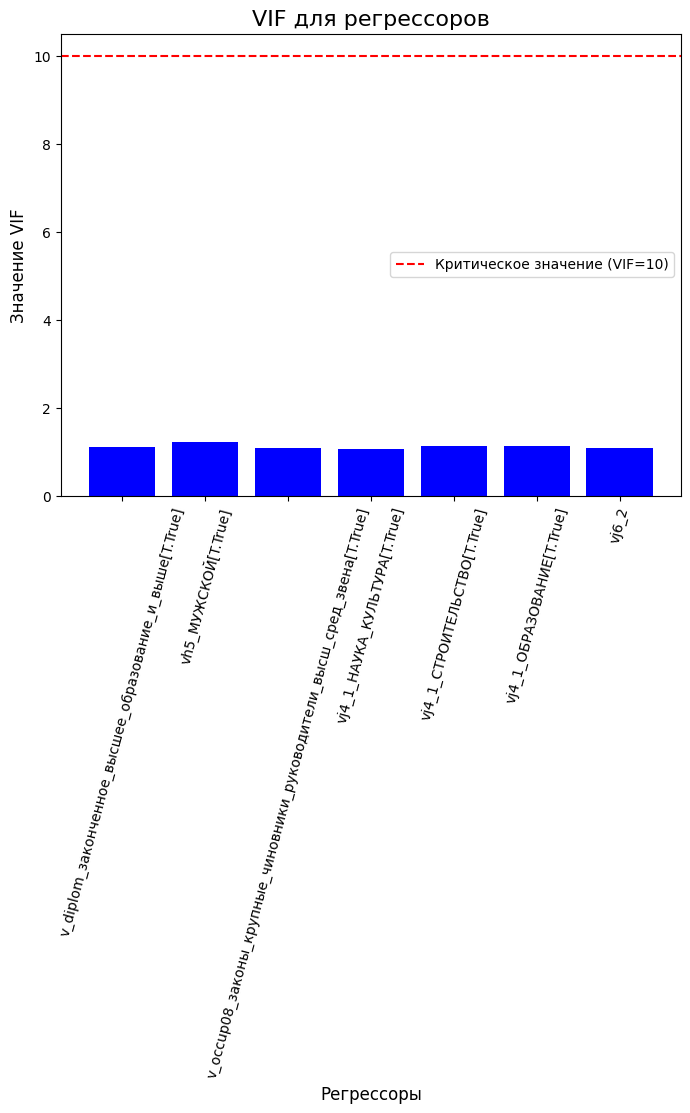

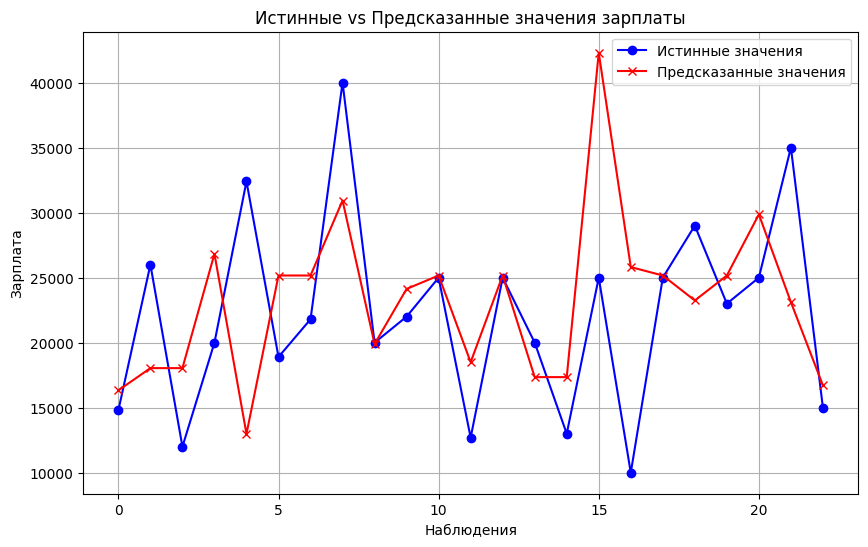

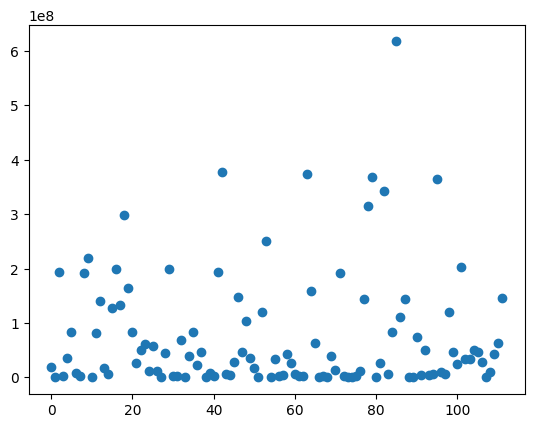



count    1.120000e+02
mean     1.039228e-09
std      8.812541e+03
min     -2.484056e+04
25%     -5.320231e+03
50%     -1.396136e+02
75%      6.417381e+03
max      1.941414e+04
dtype: float64




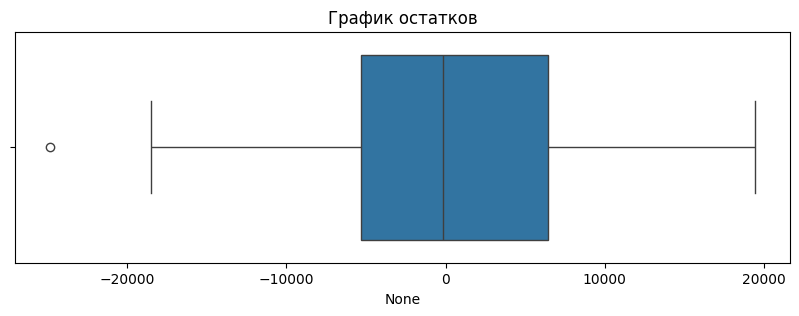

Результаты теста голдфельда-квандта: 
 f-statictic: 1.2384339494700225 
 p-value: 0.27526780121340266 
 Альтернативная гипотеза: increasing 

Результаты теста Бройша-Пагана: 
 lm: 13.168472597235596 
 lm p-value: 0.06810843951221734 
 f-statictic: 1.9795897496371986 
 p-value: 0.06477785168377972 

Результаты теста Уайта: 
 lm: 41.901735346713295 
 lm p-value: 0.013235536698481373 
 f-statictic: 2.166869485045288 
 p-value: 0.004932822772253449 



In [79]:
model_novosib_2017 = model_and_analitics_main(nov_2017_dummest, cols_modded_2017_nov)

# Саратов

### 2012


In [30]:
sar_2012_dummest = del_missing(saratov_2012, cols_2012, 'q')

(167, 965)
after drop na: (167, 965)
After mapping: 

{'незаконченное_среднее_образование', 'законченное_среднее_специальное_образование', 'законченное_высшее_образование_и_выше', 'незаконченное_среднее_образование_и_что_то_еще', 'законченное_среднее_образование'}
{'МУЖСКОЙ', 'ЖЕНСКИЙ'}
{'неквалифицированные_рабочие_всех_отраслей', 'законы_крупные_чиновники_руководители_высш_сред_звена', 'квалифицированные_рабочие_занятые_ручным_трудом', 'специалисты_высшего_уровня_квалификации', 'квалифицированные_рабочие_использующие_машины_и_механизмы', 'специалисты_среднего_уровня_квалификации_чиновники', 'работники_сферы_торговли_и_услуг', 'служащие_офисные_и_по_обслуживанию_клиентов'}
{'ЮРИСПРУДЕНЦИЯ', 'ОБРАЗОВАНИЕ', 'ТОРГОВЛЯ_БЫТОВОЕ_ОБСЛУЖИВАНИЕ', 'ФИНАНСЫ', 'СТРОИТЕЛЬСТВО', 'ТРАНСПОРТ_СВЯЗЬ', 'ЗДРАВООХРАНЕНИЕ', 'ВОЕННО_ПРОМЫШЛЕННЫЙ_КОМПЛЕКС', 'ЭНЕРГЕТИЧЕСКАЯ_ПРОМЫШЛЕННОСТЬ', 'АРМИЯ_MVD_ОРГАНЫ_БЕЗОПАСНОСТИ', 'ЛЕГКАЯ_ПИЩЕВАЯ_ПРОМЫШЛЕННОСТЬ', 'ГРАЖДАНСКОЕ_МАШИНОСТРОЕНИЕ', 'НАУКА_КУЛЬТУРА', 'IT_ИН

<ipython-input-10-bc9b3f1b23a1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1.dropna(subset=cols, inplace=True) # [f'{letter}j13.2', f'{letter}i3', f'{letter}_diplom', f'{letter}h5', f'{letter}_age', f'{letter}j6.2']


In [42]:
cols_modded_2012_sar = [
    'qj6_2',
    'q_diplom_законченное_высшее_образование_и_выше',
    'qh5_МУЖСКОЙ',
    'q_occup08_законы_крупные_чиновники_руководители_высш_сред_звена',
    'qj4_1_НАУКА_КУЛЬТУРА',
    'qj4_1_СТРОИТЕЛЬСТВО',
    'qj4_1_ОБРАЗОВАНИЕ'
    ]

### Запуск

                            OLS Regression Results                            
Dep. Variable:              zarabotok   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     5.265
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           2.03e-05
Time:                        03:27:58   Log-Likelihood:                -1702.7
No. Observations:                 165   AIC:                             3421.
Df Residuals:                     157   BIC:                             3446.
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

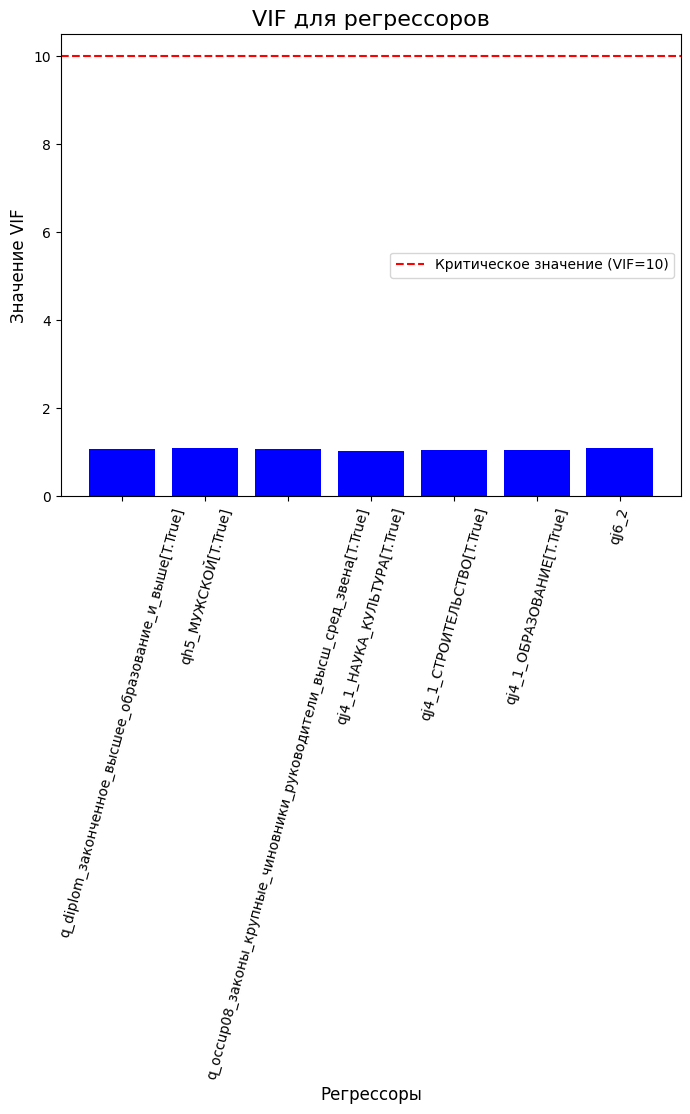

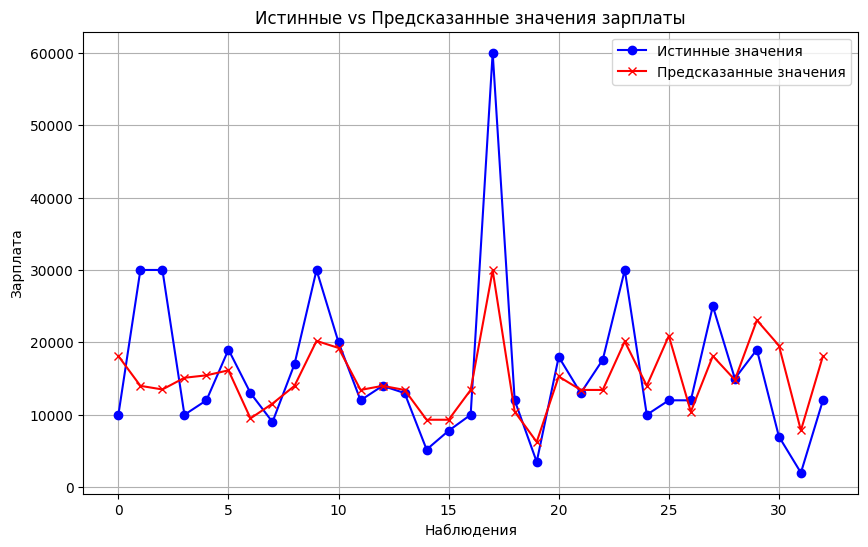

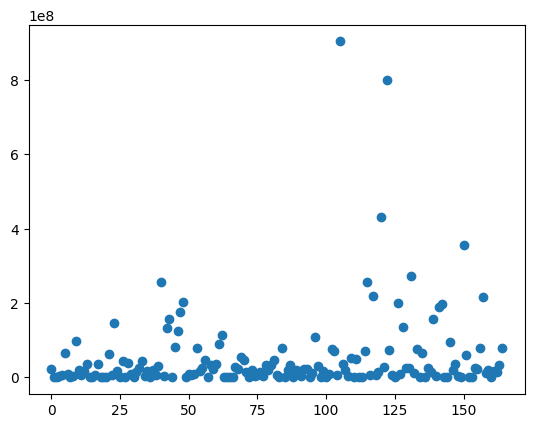



count    1.650000e+02
mean     7.964197e-10
std      7.358297e+03
min     -1.478284e+04
25%     -4.431552e+03
50%     -6.127205e+02
75%      3.820665e+03
max      3.005876e+04
dtype: float64




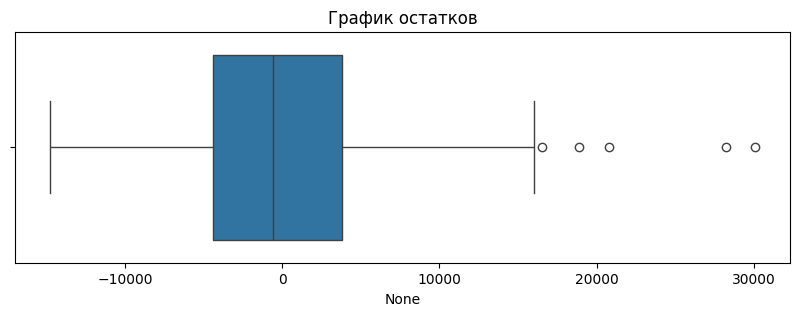

Результаты теста голдфельда-квандта: 
 f-statictic: 2.232333467992983 
 p-value: 0.0024390282244647807 
 Альтернативная гипотеза: increasing 

Результаты теста Бройша-Пагана: 
 lm: 26.07248724710149 
 lm p-value: 0.0004888658127668113 
 f-statictic: 4.209163692307831 
 p-value: 0.0002794173419312946 

Результаты теста Уайта: 
 lm: 63.18426214966168 
 lm p-value: 4.161289148578725e-06 
 f-statictic: 4.2258176052091105 
 p-value: 9.983696928313265e-08 



In [80]:
model_saratov_2012 = model_and_analitics_main(sar_2012_dummest, cols_modded_2012_sar)

### 2017

In [33]:
sar_2017_dummest = del_missing(saratov_2017, cols_2017, 'v')

(127, 827)
after drop na: (127, 827)
After mapping: 

{'законченное_высшее_образование_и_выше', 'законченное_среднее_образование', 'законченное_среднее_специальное_образование', 'незаконченное_среднее_образование_и_что_то_еще'}
{'МУЖСКОЙ', 'ЖЕНСКИЙ'}
{'неквалифицированные_рабочие_всех_отраслей', 'законы_крупные_чиновники_руководители_высш_сред_звена', 'квалифицированные_рабочие_занятые_ручным_трудом', 'специалисты_высшего_уровня_квалификации', 'работники_сферы_торговли_и_услуг', 'квалифицированные_рабочие_использующие_машины_и_механизмы', 'специалисты_среднего_уровня_квалификации_чиновники', 'служащие_офисные_и_по_обслуживанию_клиентов'}
{'ЮРИСПРУДЕНЦИЯ', 'ФИНАНСЫ', 'ТОРГОВЛЯ_БЫТОВОЕ_ОБСЛУЖИВАНИЕ', 'ОБРАЗОВАНИЕ', 'СТРОИТЕЛЬСТВО', 'ТРАНСПОРТ_СВЯЗЬ', 'ЗДРАВООХРАНЕНИЕ', 'ВОЕННО_ПРОМЫШЛЕННЫЙ_КОМПЛЕКС', 'ЭНЕРГЕТИЧЕСКАЯ_ПРОМЫШЛЕННОСТЬ', 'АРМИЯ_MVD_ОРГАНЫ_БЕЗОПАСНОСТИ', 'ОРГАНИЗАЦИЯ_ОБЩЕСТВЕННОГО_ПИТАНИЯ', 'ЛЕГКАЯ_ПИЩЕВАЯ_ПРОМЫШЛЕННОСТЬ', 'ГРАЖДАНСКОЕ_МАШИНОСТРОЕНИЕ', 'РЕКЛАМА_МАРКЕТИНГ', 'НА

<ipython-input-10-bc9b3f1b23a1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1.dropna(subset=cols, inplace=True) # [f'{letter}j13.2', f'{letter}i3', f'{letter}_diplom', f'{letter}h5', f'{letter}_age', f'{letter}j6.2']


In [34]:
cols_modded_2017_sar = [
    'vj4_1_УСЛУГИ_НАСЕЛЕНИЮ',
    'vj6_2',
    'v_diplom_законченное_высшее_образование_и_выше',
    'vh5_МУЖСКОЙ',
    'v_occup08_законы_крупные_чиновники_руководители_высш_сред_звена',
    'vj4_1_НАУКА_КУЛЬТУРА',
    'vj4_1_СТРОИТЕЛЬСТВО',
    'vj4_1_ОБРАЗОВАНИЕ'
    ]

### Запуск

                            OLS Regression Results                            
Dep. Variable:              zarabotok   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     3.263
Date:                Thu, 19 Dec 2024   Prob (F-statistic):            0.00224
Time:                        03:35:52   Log-Likelihood:                -1278.9
No. Observations:                 120   AIC:                             2576.
Df Residuals:                     111   BIC:                             2601.
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

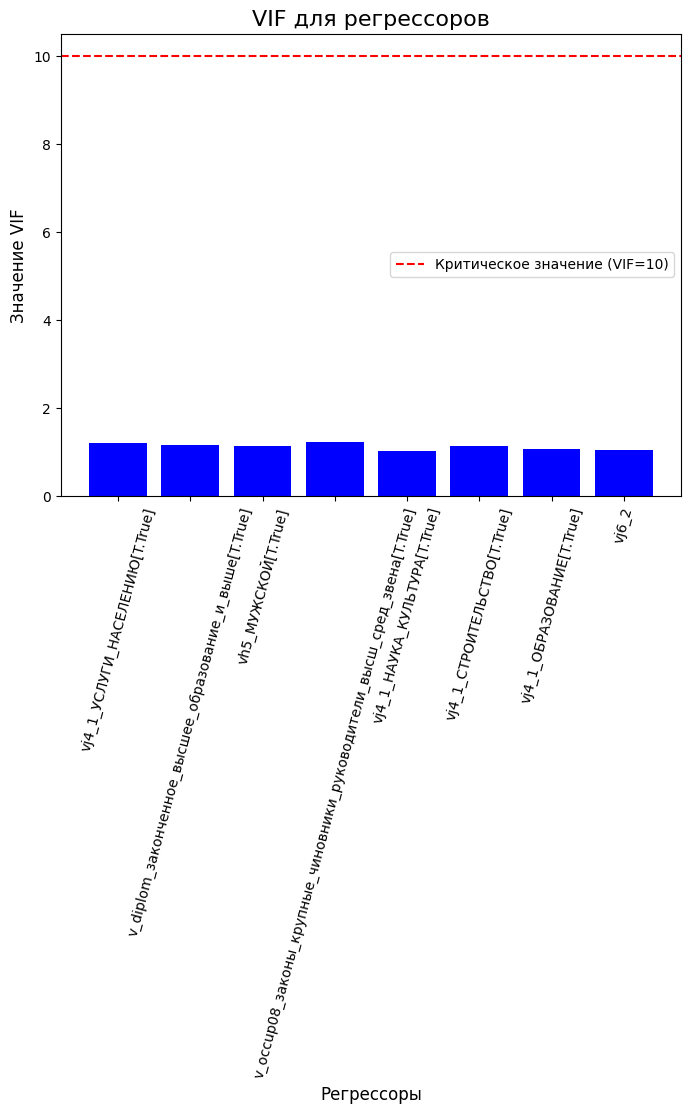

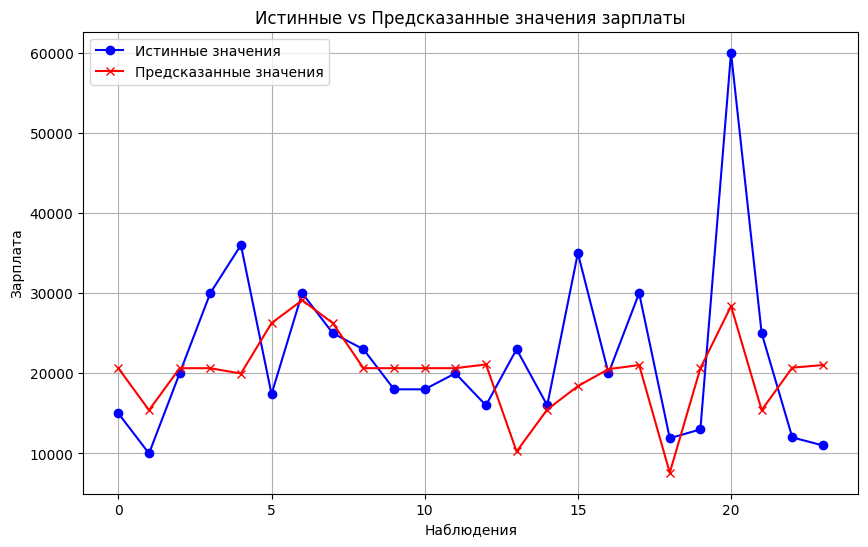

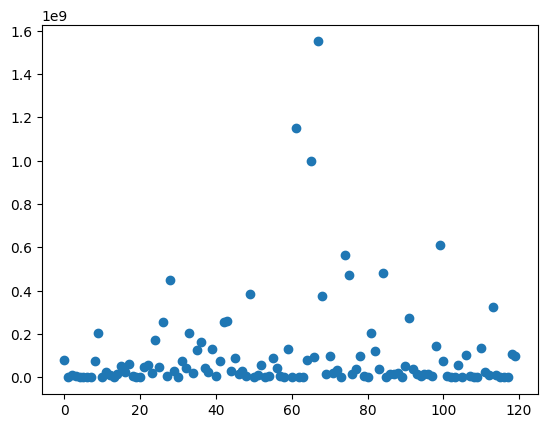



count    1.200000e+02
mean     9.346271e-10
std      1.033172e+04
min     -2.474615e+04
25%     -5.461362e+03
50%     -1.027735e+03
75%      3.877211e+03
max      3.936298e+04
dtype: float64




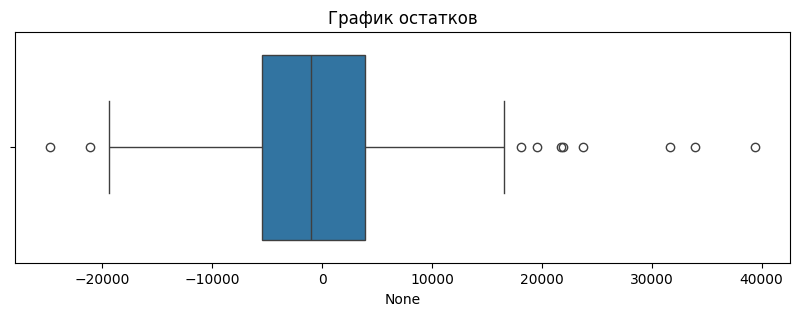

Результаты теста голдфельда-квандта: 
 f-statictic: 1.5143636473586393 
 p-value: 0.1122713961934942 
 Альтернативная гипотеза: increasing 

Результаты теста Бройша-Пагана: 
 lm: 13.686453890545653 
 lm p-value: 0.09031290539140661 
 f-statictic: 1.7862215557724987 
 p-value: 0.08715807607122618 

Результаты теста Уайта: 
 lm: 22.75514071372665 
 lm p-value: 0.3009770018373558 
 f-statictic: 1.1582920409330715 
 p-value: 0.30667656818129513 



In [81]:
model_saratov_2017 = model_and_analitics_main(sar_2017_dummest, cols_modded_2017_sar)